In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("result.csv")

In [3]:
df

,Nome,Tipo Evento,Data,Horário Abertura,Classificação,Local,Cidade,URL Dados
0,SEMANA DOS NAMORADOS - BLACKPOT FLORIANÓPOLIS,Gastronomia,10/06/2024 a 16/06/2024,NaN,Livre,Blackpot Restaurant,Florianópolis,https://soulapi.blueticket.com.br/api/v2/event...
1,XVIII Estação Cenarium Inverno - Mostra Didática,Teatro,16/06/2024,15:00,Livre,Teatro Ademir Rosa - CIC,Florianópolis,https://soulapi.blueticket.com.br/api/v2/event...
2,"TUM SOS RS apresenta: Filipe Catto, Nei Lisboa...",Shows,16/06/2024,15:00,Livre,Boulevard 14/32 — Aeroporto de Florianópolis,Florianópolis,https://soulapi.blueticket.com.br/api/v2/event...
3,Peça Teatral NUNCA DESISTA DOS SEUS SONHOS de ...,Teatro,22/06/2024,19:00,10 anos,Teatro Ademir Rosa - CIC,Florianópolis,https://soulapi.blueticket.com.br/api/v2/event...
4,Heaven - 22/06,Baladas,22/06/2024,23:00,18 anos,Heaven,Florianópolis,https://soulapi.blueticket.com.br/api/v2/event...
...,...,...,...,...,...,...,...,...
378,IMERSÃO 4Ps - Empresários de Elite,Cursos,29/06/2024,11:00,NaN,Vila Fátima,Florianópolis,https://www.sympla.com.br/api/v1/search
379,Workshop Vivencial Constelação Familiar,Cursos,04/06/2024,20:00,NaN,Casa,Florianópolis,https://www.sympla.com.br/api/v1/search
380,1ª FEIGEVUADA DO GRUPO ESCOTEIRO GARAPUVU,Congressos,07/07/2024,14:00,NaN,"Rod. João Gualberto Soares, 4360",Florianópolis,https://www.sympla.com.br/api/v1/search
381,Seminário Prosperar,Congressos,06/07/2024,20:00,NaN,Mais de Cristo Canasvieiras,Florianópolis,https://www.sympla.com.br/api/v1/search


## Tipo de Evento

In [4]:
count_event_type = df['Tipo Evento'].value_counts()
count_event_type

Tipo Evento
Cursos         123
Baladas         80
Congressos      56
Teatro          30
Shows           27
Eventos         13
Gastronomia      9
Congresso        3
Esportivo        3
Stand Up         1
Name: count, dtype: int64

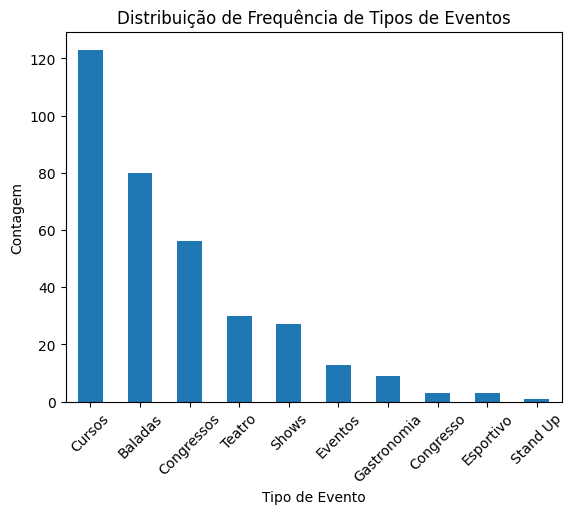

In [5]:
df["Tipo Evento"].value_counts().plot(kind="bar")
plt.xlabel("Tipo de Evento")
plt.ylabel("Contagem")
plt.title("Distribuição de Frequência de Tipos de Eventos")
plt.xticks(rotation=45)
plt.show()

## Por mês

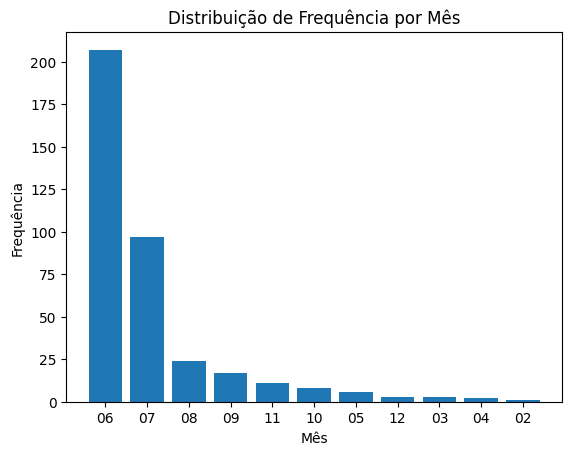

In [6]:
df['Mês'] = df['Data'].str.split('/').str[1]
df_agrupado = df['Mês'].value_counts()

plt.bar(df_agrupado.index, df_agrupado.values)
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência por Mês')
plt.show()

## Tipo de Evento x Mês

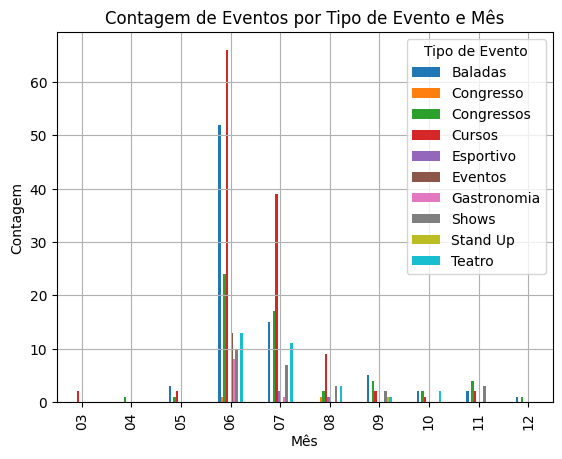

In [7]:
df_agrupado = df.groupby(["Mês", "Tipo Evento"])["Nome"].count().unstack()
df_agrupado.plot(kind="bar")
plt.xlabel("Mês")
plt.ylabel("Contagem")
plt.title("Contagem de Eventos por Tipo de Evento e Mês")
plt.legend(title="Tipo de Evento")
plt.grid(True)  # Adicionar linhas de grade para melhor visualização
plt.show()

## Horário de Abertura

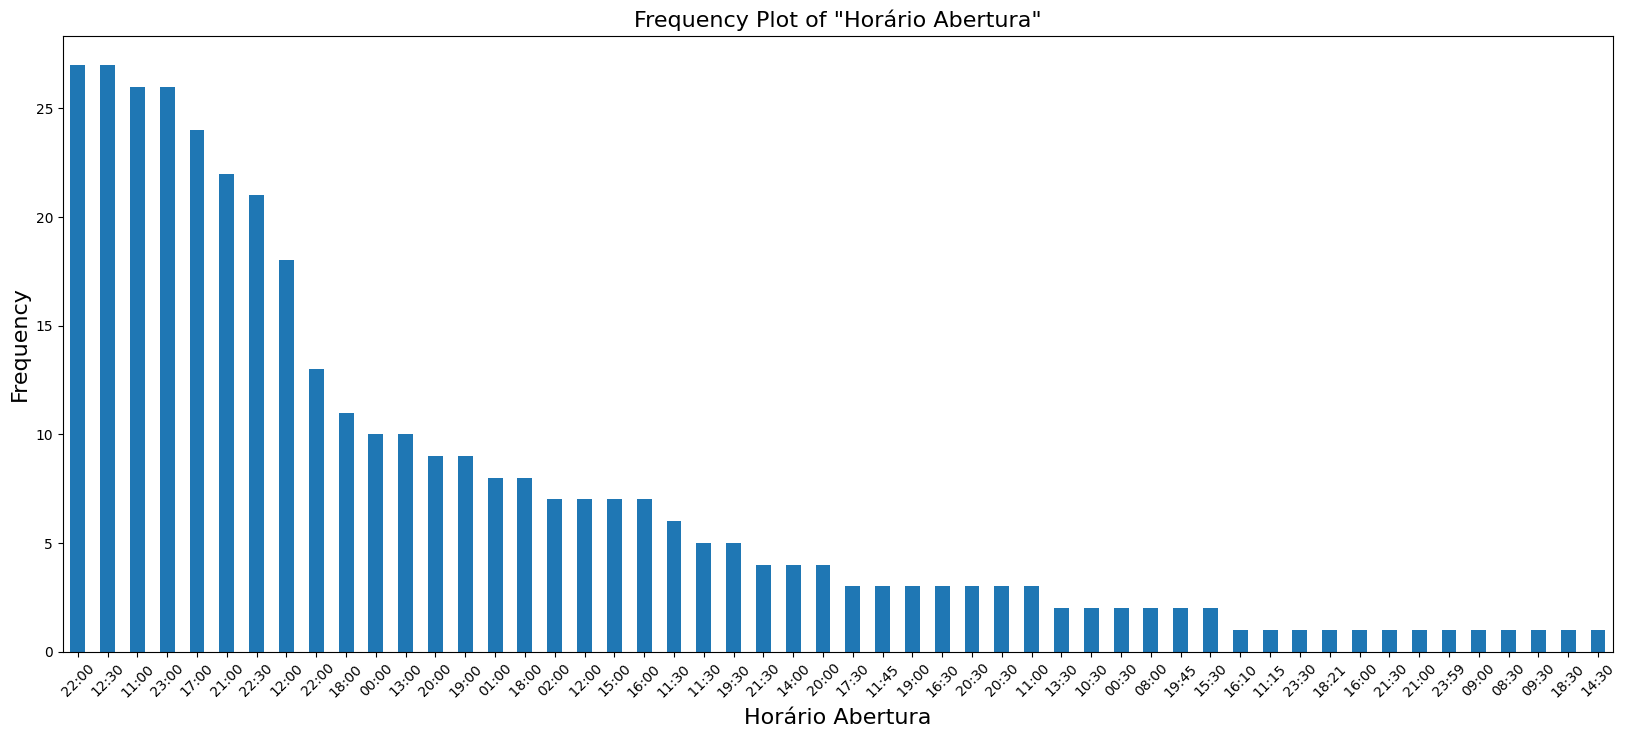

In [8]:
plt.figure(figsize=(20, 8))
df['Horário Abertura'].value_counts().plot(kind='bar')
plt.xlabel('Horário Abertura', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Frequency Plot of "Horário Abertura"', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [9]:
df_group_event_type_open_hour = df.groupby(['Tipo Evento', 'Hor\u00e1rio Abertura']).size()
df_group_event_type_open_hour

Tipo Evento  Horário Abertura
Baladas       12:00              7
              16:00              1
              20:00              3
              20:30              3
              21:00              1
                                ..
Teatro       21:00               1
             21:30               1
             22:30               1
             23:00               4
             23:30               1
Length: 113, dtype: int64

<Figure size 4000x800 with 0 Axes>

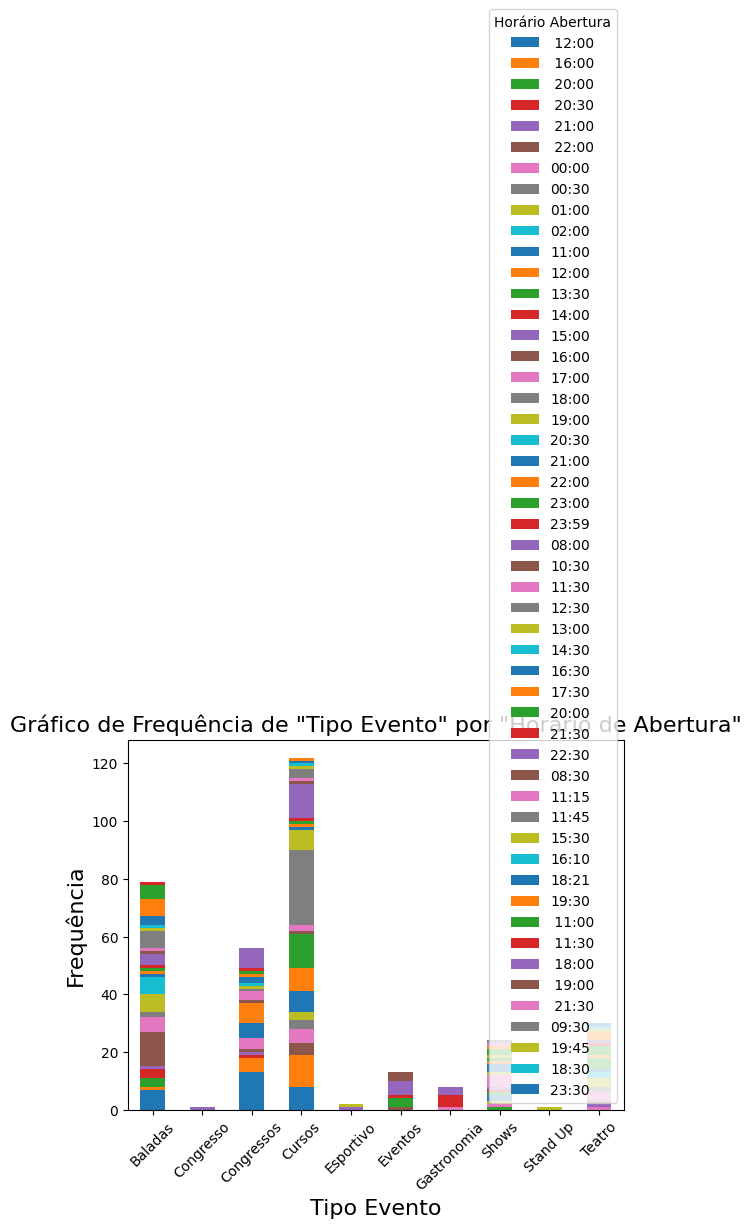

In [10]:
df_group_event_type_open_hour = df.groupby(['Tipo Evento', 'Hor\u00e1rio Abertura']).size()
plt.figure(figsize=(40, 8))
df_group_event_type_open_hour.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Tipo Evento', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.title('Gráfico de Frequência de "Tipo Evento" por "Horário de Abertura"', fontsize=16)
plt.xticks(rotation=45)
plt.show()

## Por Site de Venda de Ingressos

In [11]:
base_url_counts = df['URL Dados'].str.split('/').str[2].value_counts()
base_url_counts

URL Dados
www.sympla.com.br            275
soulapi.blueticket.com.br     57
www.pensanoevento.com.br      50
Name: count, dtype: int64

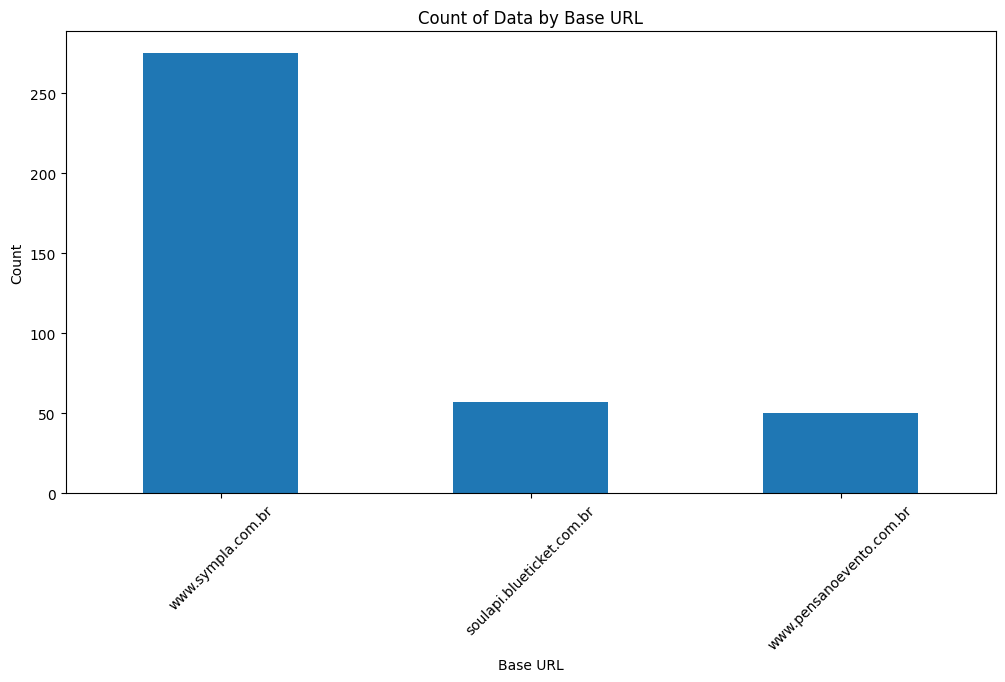

In [12]:
plt.figure(figsize=(12, 6))
base_url_counts.plot(kind='bar')
plt.title('Count of Data by Base URL')
plt.xlabel('Base URL')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()